In [49]:
!which jupyter

/Users/parthraghav/Documents/Developer/Projects/Visual-Accessibility/venv/bin/jupyter


In [50]:
#importing dependencies

from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.utils.visualizer import Visualizer
from detectron2.config import get_cfg
from detectron2.engine import DefaultPredictor
from detectron2 import model_zoo

import random
import cv2
import json
import os
import numpy as np
import torch
import torchvision

from IPython.display import Image, display
import PIL


In [51]:
# util functions

def showImage(imgData):
    display(PIL.Image.fromarray(imgData))


def showImageFromFile(imgPath):
    Image(filename=imgPath) 


def getImage(imgPath):
    return cv2.imread(imgPath)


def getTestImage():
    return getImage('../tests/2.jpg')


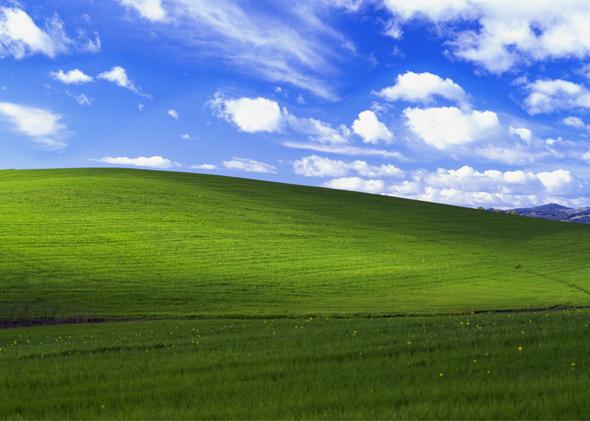

In [52]:
im = getTestImage()
showImage(im[:, :, ::-1])

# Panoptic segmentation model

In [53]:
# Get configuration
cfg = get_cfg()
# Set configuration variables
cfg.MODEL.DEVICE = 'cpu'
cfg.merge_from_file(model_zoo.get_config_file(
    "COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml"))
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(
    "COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml")
cfg

CfgNode({'VERSION': 2, 'MODEL': CfgNode({'LOAD_PROPOSALS': False, 'MASK_ON': True, 'KEYPOINT_ON': False, 'DEVICE': 'cpu', 'META_ARCHITECTURE': 'PanopticFPN', 'WEIGHTS': 'https://dl.fbaipublicfiles.com/detectron2/COCO-PanopticSegmentation/panoptic_fpn_R_101_3x/139514519/model_final_cafdb1.pkl', 'PIXEL_MEAN': [103.53, 116.28, 123.675], 'PIXEL_STD': [1.0, 1.0, 1.0], 'BACKBONE': CfgNode({'NAME': 'build_resnet_fpn_backbone', 'FREEZE_AT': 2}), 'FPN': CfgNode({'IN_FEATURES': ['res2', 'res3', 'res4', 'res5'], 'OUT_CHANNELS': 256, 'NORM': '', 'FUSE_TYPE': 'sum'}), 'PROPOSAL_GENERATOR': CfgNode({'NAME': 'RPN', 'MIN_SIZE': 0}), 'ANCHOR_GENERATOR': CfgNode({'NAME': 'DefaultAnchorGenerator', 'SIZES': [[32], [64], [128], [256], [512]], 'ASPECT_RATIOS': [[0.5, 1.0, 2.0]], 'ANGLES': [[-90, 0, 90]], 'OFFSET': 0.0}), 'RPN': CfgNode({'HEAD_NAME': 'StandardRPNHead', 'IN_FEATURES': ['p2', 'p3', 'p4', 'p5', 'p6'], 'BOUNDARY_THRESH': -1, 'IOU_THRESHOLDS': [0.3, 0.7], 'IOU_LABELS': [0, -1, 1], 'BATCH_SIZE_PER

In [54]:
predictor = DefaultPredictor(cfg)
# Create a simple end-to-end predictor with the given config
# that runs on single device for a single input image.
predictor

In [56]:
panoptic_seg, segments_info = predictor(im)["panoptic_seg"]

In [57]:
panoptic_seg

tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [2, 2, 2,  ..., 2, 2, 2],
        [2, 2, 2,  ..., 2, 2, 2],
        [2, 2, 2,  ..., 2, 2, 2]], dtype=torch.int32)

In [58]:
segments_info

[{'id': 1, 'isthing': False, 'category_id': 40, 'area': 110239},
 {'id': 2, 'isthing': False, 'category_id': 46, 'area': 137098}]